In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

pd.set_option('display.max_colwidth', None)

In [92]:
data = pd.read_csv('../data/Titanic-Dataset.csv')

In [93]:
data['Pclass'] = data['Pclass'].astype('object')

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,Sex,percent
male,577,64.76
female,314,35.24


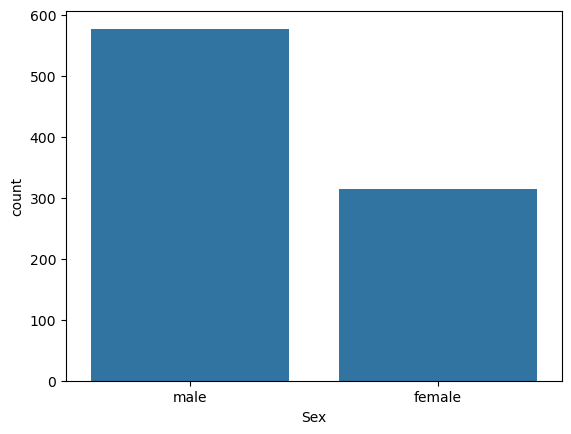

In [53]:
# male vs female counts
sns.countplot(data, x="Sex")

sex = pd.DataFrame(data['Sex'].value_counts())
sex['percent'] = round(sex['Sex'] / sex['Sex'].sum() *100, 2)
sex

0
Sex    Pclass     
female 1        94
       2        76
       3       144
male   1       122
       2       108
       3       347

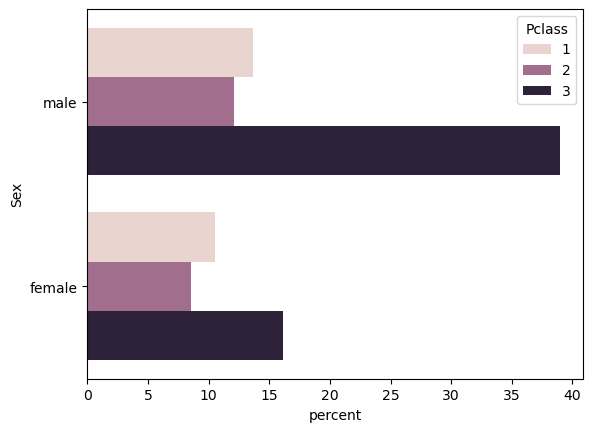

In [61]:
#breakdown of class by sex
sns.countplot(data, y="Sex", hue='Pclass', stat='percent')

pd.DataFrame(data[['Sex', 'Pclass']].groupby('Sex').value_counts()).sort_values(['Sex','Pclass'])

0
SibSp Sex        
0     female  174
      male    434
1     female  106
      male    103
2     female   13
      male     15
3     female   11
      male      5
4     female    6
      male     12
5     female    1
      male      4
8     female    3
      male      4

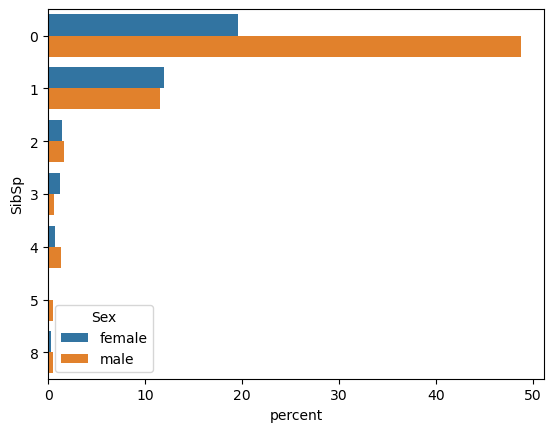

In [65]:
#breakdown of sibling number by sex
sns.countplot(data, y="SibSp", hue='Sex', stat='percent')

pd.DataFrame(data[['Sex', 'SibSp']].groupby('SibSp').value_counts()).sort_values(['SibSp','Sex'])

<Axes: xlabel='Age', ylabel='Count'>

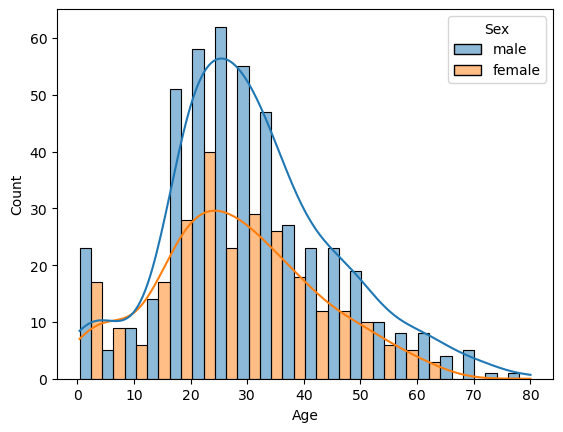

In [9]:
# distribution of ages by sex
sns.histplot(data, x='Age', hue='Sex', multiple='dodge', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

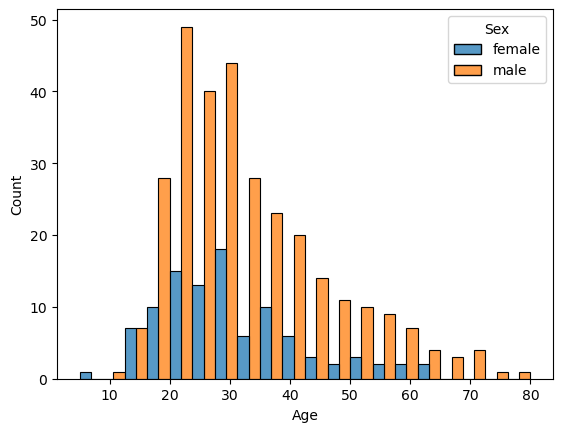

In [13]:
# distribution of ages for those with no siblings, parents, children, or spouses
sns.histplot(data[(data['SibSp'] == 0) & (data['Parch']==0)].dropna(subset='Age'), x='Age', hue='Sex', multiple='dodge', bins=20)

3    491
1    216
2    184
Name: Pclass, dtype: int64

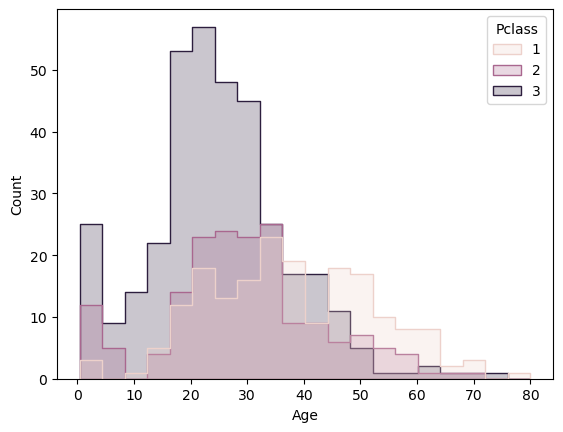

In [68]:
# count of age within class - do not see much of a difference between class 1 and 2
sns.histplot(data, x='Age', hue='Pclass', element='step')

data['Pclass'].value_counts()

<Axes: xlabel='Age', ylabel='Count'>

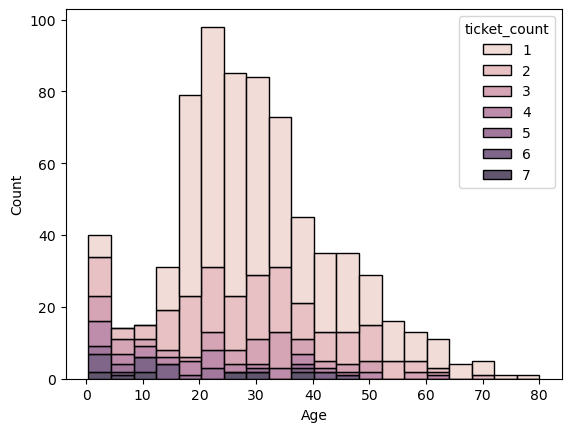

In [94]:
# added column detailing the number of other people that shared the same ticket by age 
## see higher number at lower ages, possibly because of multiple children
ticket_count = pd.DataFrame(data['Ticket'].value_counts()).reset_index().rename({'index':'Ticket','Ticket':'ticket_count'}, axis=1)
ticket_count

data = data.merge(ticket_count, on='Ticket', how='left')

sns.histplot(data, x='Age', hue='ticket_count',multiple='stack')

,Pclass,ticket_count,count,percent_class
0,1,1,97,44.91
1,1,2,72,33.33
2,1,3,27,12.50
3,1,4,20,9.26
4,2,1,107,58.15
5,2,2,48,26.09
6,2,3,24,13.04
7,2,5,5,2.72
8,3,1,343,69.86
9,3,2,68,13.85


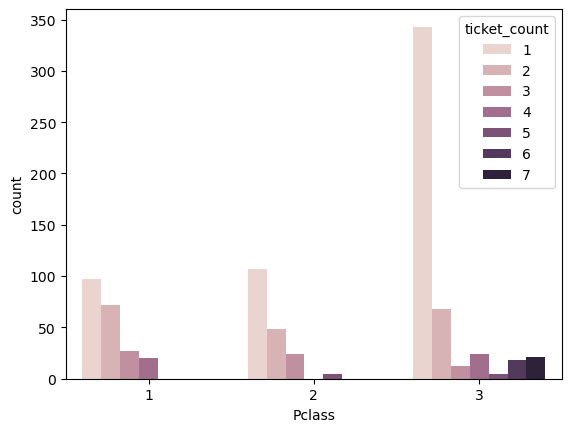

In [88]:
#breakdown of ticket groups by class and thn getting percent of each count by class
sns.countplot(data, x='Pclass', hue='ticket_count')

pclass_tc = pd.DataFrame(data[['Pclass','ticket_count']].groupby('Pclass').value_counts()).reset_index().sort_values(['Pclass','ticket_count']).rename(columns={0:'count'})
pclass_tc['percent_class'] = round(pclass_tc['count'] / pclass_tc.groupby('Pclass')['count'].transform('sum') * 100, 2)
pclass_tc


In [112]:
# investigating how names are stored and related to relatives
## Mrs is always followed by husbands name with maiden name in parenthesis, but children don't follow 
data[data['Name'].str.contains('Mrs')]['Name'].str.replace('Mrs','Mr').str.replace(r'\(\D+\)', '')

C:\Users\Conrad\AppData\Local\Temp\ipykernel_26320\3020588869.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data[data['Name'].str.contains('Mrs')]['Name'].str.replace('Mrs','Mr').str.replace(r'\(\D+\)', '')


1          Cumings, Mr. John Bradley 
3        Futrelle, Mr. Jacques Heath 
8               Johnson, Mr. Oscar W 
9               Nasser, Mr. Nicholas 
15                     Hewlett, Mr.  
                    ...              
871    Beckwith, Mr. Richard Leonard 
874              Abelson, Mr. Samuel 
879            Potter, Mr. Thomas Jr 
880             Shelley, Mr. William 
885                Rice, Mr. William 
Name: Name, Length: 129, dtype: object

In [120]:
data[data['Name'] == 'Abelson, Mr. Samuel']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_count
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0,NaN,C,2


<Axes: xlabel='Pclass', ylabel='count'>

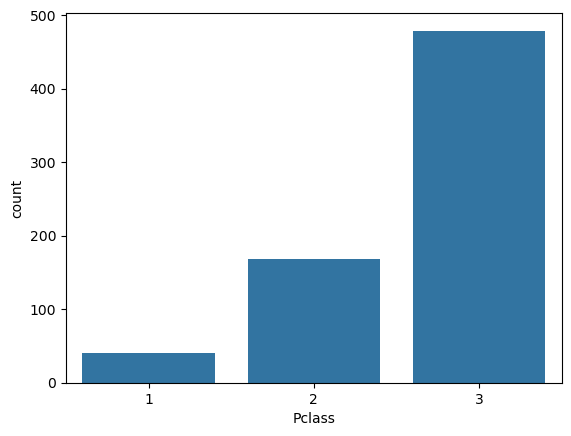

In [44]:
sns.countplot(data[data['Cabin'].isna()], x = 'Pclass')